In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [72]:
sigb = 2.0
Lb = 1.0
D = 20 * Lb
r = D / 2.0 / np.pi
nx = 128
dx  = 2.0 * r * np.sin(np.pi/nx)
print(f"sigb={sigb}, Lb={Lb},D={D},dx={dx}")

sigb=2.0, Lb=1.0,D=20.0,dx=0.15623431315877218


In [73]:
#x = np.linspace(0, D, nx,endpoint=False)
x = np.arange(nx)*dx
print(x)

[ 0.          0.15623431  0.31246863  0.46870294  0.62493725  0.78117157
  0.93740588  1.09364019  1.24987451  1.40610882  1.56234313  1.71857744
  1.87481176  2.03104607  2.18728038  2.3435147   2.49974901  2.65598332
  2.81221764  2.96845195  3.12468626  3.28092058  3.43715489  3.5933892
  3.74962352  3.90585783  4.06209214  4.21832646  4.37456077  4.53079508
  4.68702939  4.84326371  4.99949802  5.15573233  5.31196665  5.46820096
  5.62443527  5.78066959  5.9369039   6.09313821  6.24937253  6.40560684
  6.56184115  6.71807547  6.87430978  7.03054409  7.18677841  7.34301272
  7.49924703  7.65548134  7.81171566  7.96794997  8.12418428  8.2804186
  8.43665291  8.59288722  8.74912154  8.90535585  9.06159016  9.21782448
  9.37405879  9.5302931   9.68652742  9.84276173  9.99899604 10.15523036
 10.31146467 10.46769898 10.62393329 10.78016761 10.93640192 11.09263623
 11.24887055 11.40510486 11.56133917 11.71757349 11.8738078  12.03004211
 12.18627643 12.34251074 12.49874505 12.65497937 12.8

In [74]:
dist = np.eye(nx)
for i in range(nx):
    for j in range(nx):
        #dist[i,j] = min(np.abs(i-j), nx - np.abs(i-j))*dx
        dist[i,j] = np.abs(nx/np.pi*np.sin(np.pi*(i-j)/nx))
print(np.exp(-dist**2))
print(np.exp((D/nx)**2))

[[1.00000000e+00 3.67953312e-01 1.83745583e-02 ... 1.25431954e-04
  1.83745583e-02 3.67953312e-01]
 [3.67953312e-01 1.00000000e+00 3.67953312e-01 ... 1.18463395e-07
  1.25431954e-04 1.83745583e-02]
 [1.83745583e-02 3.67953312e-01 1.00000000e+00 ... 1.57409862e-11
  1.18463395e-07 1.25431954e-04]
 ...
 [1.25431954e-04 1.18463395e-07 1.57409862e-11 ... 1.00000000e+00
  3.67953312e-01 1.83745583e-02]
 [1.83745583e-02 1.25431954e-04 1.18463395e-07 ... 3.67953312e-01
  1.00000000e+00 3.67953312e-01]
 [3.67953312e-01 1.83745583e-02 1.25431954e-04 ... 1.83745583e-02
  3.67953312e-01 1.00000000e+00]]
1.0247145259186305


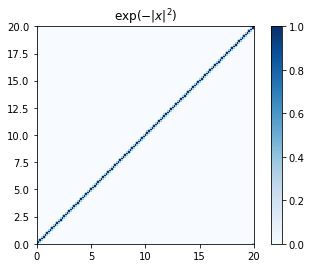

In [75]:
fig, ax = plt.subplots()
xaxis = np.linspace(0, D, nx+1)
mappable = ax.pcolor(xaxis,xaxis,np.exp(-dist**2),cmap='Blues')
fig.colorbar(mappable, ax=ax)
ax.set_title(r"$\exp (-\|x\|^2)$")
ax.set_aspect("equal")
plt.show()

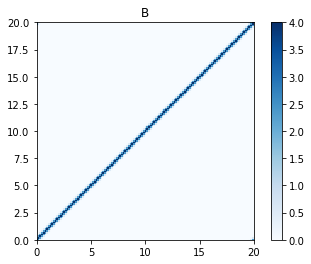

In [76]:
B = sigb**2 * np.exp(-0.5*(dist/Lb)**2)

fig, ax = plt.subplots()
xaxis = np.linspace(0, D, nx+1)
mappable = ax.pcolor(xaxis,xaxis,B,cmap='Blues')
fig.colorbar(mappable, ax=ax)
ax.set_title("B")
ax.set_aspect("equal")
plt.show()

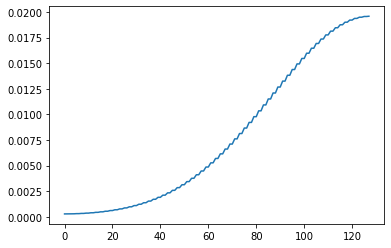

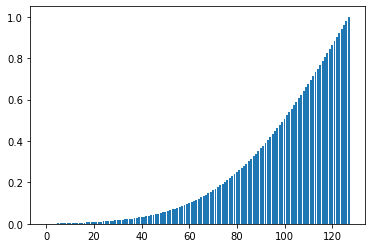

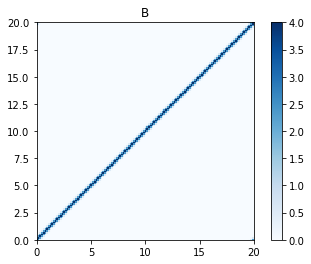

[0.00028284 0.00028585 0.00028585 0.00029492 0.00029492 0.00031014
 0.00031014 0.00033168 0.00033168 0.00035978 0.00035978 0.00039473
 0.00039473 0.00043689 0.00043689 0.00048669 0.00048669 0.00054462
 0.00054462 0.0006112  0.0006112  0.00068703 0.00068703 0.00077276
 0.00077276 0.00086908 0.00086908 0.0009767  0.0009767  0.00109639
 0.00109639 0.00122895 0.00122895 0.00137518 0.00137518 0.0015359
 0.0015359  0.00171194 0.00171194 0.0019041  0.0019041  0.00211318
 0.00211318 0.00233996 0.00233996 0.00258513 0.00258513 0.00284938
 0.00284938 0.0031333  0.0031333  0.00343739 0.00343739 0.00376206
 0.00376206 0.00410762 0.00410762 0.00447423 0.00447423 0.00486192
 0.00486192 0.00527056 0.00527056 0.00569987 0.00569987 0.00614936
 0.00614936 0.00661839 0.00661839 0.00710609 0.00710609 0.00761141
 0.00761141 0.00813307 0.00813307 0.0086696  0.0086696  0.00921931
 0.00921931 0.00978029 0.00978029 0.01035046 0.01035046 0.01092752
 0.01092752 0.01150899 0.01150899 0.01209224 0.01209224 0.01267

In [77]:
la, v = np.linalg.eigh(B)
plt.plot(la/np.sum(la))
plt.show()
cum = np.zeros(la.size)
for i in range(la.size):
    cum[i] = np.sum(la[:i+1])/np.sum(la)
plt.bar(np.arange(la.size),cum)
plt.show()
fig, ax = plt.subplots()
xaxis = np.linspace(0, D, nx+1)
B = v[:,::-1] @ np.diag(la[::-1]) @ v[:,::-1].transpose()
mappable = ax.pcolor(xaxis,xaxis,B,cmap='Blues')
fig.colorbar(mappable, ax=ax)
ax.set_title("B")
ax.set_aspect("equal")
plt.show()
print(la/np.sum(la))
print(len(la[cum<0.1]))

69.25776004664267


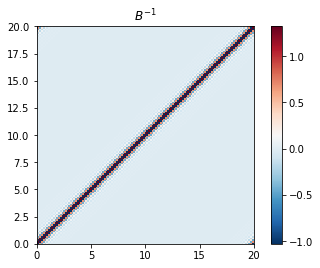

[[ 1.00000000e+00 -2.22044605e-16 -2.22044605e-16 ... -8.88178420e-16
  -4.44089210e-16 -4.44089210e-16]
 [ 2.22044605e-16  1.00000000e+00 -1.05471187e-15 ... -5.55111512e-17
  -6.66133815e-16  3.33066907e-16]
 [-5.55111512e-17 -1.24900090e-16  1.00000000e+00 ... -6.93889390e-18
  -2.28983499e-16  1.87350135e-16]
 ...
 [ 0.00000000e+00  0.00000000e+00 -2.77555756e-17 ...  1.00000000e+00
   6.66133815e-16 -1.11022302e-16]
 [ 0.00000000e+00  2.22044605e-16  0.00000000e+00 ...  1.99840144e-15
   1.00000000e+00  8.88178420e-16]
 [ 8.88178420e-16  4.44089210e-16  0.00000000e+00 ...  4.44089210e-16
   0.00000000e+00  1.00000000e+00]]


In [78]:
Binv = np.linalg.inv(B)
print(np.linalg.cond(Binv))
nv = len(la[cum<0.1])
la = la[::-1]
v = v[:,::-1]
#print(la[:nv])
#Binv = v[:,:nv] @ np.diag(1.0/la[:nv]) @ v[:,:nv].transpose()
fig, ax = plt.subplots()
mappable = ax.pcolor(xaxis,xaxis,Binv,cmap='RdBu_r')
fig.colorbar(mappable, ax=ax)
ax.set_title(r"$B^{-1}$")
ax.set_aspect("equal")
plt.show()
print(B@Binv)

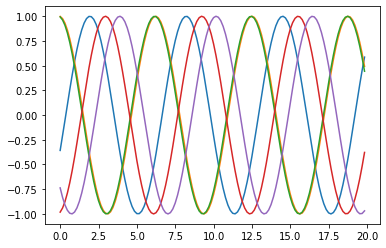

1.0


In [79]:
k = 1
for i in range(5):
    theta = 2.0 * np.pi * np.random.rand(1)
    xk = np.sin(k*x + theta*np.ones(x.size))
    plt.plot(x, xk)
plt.show()

ak = 1.0/np.linalg.norm(xk)
xk = ak*xk
print(np.linalg.norm(xk))

[0.0997055  0.10004029 0.10103228 0.1026428  0.1048058  0.1074282
 0.11039386 0.11357268 0.1168333  0.12005682 0.12314933]
[-1.00128089 -0.99982507 -0.99553987 -0.98867152 -0.97961466 -0.96888169
 -0.95705507 -0.94472613 -0.93243335 -0.92061316 -0.90956794]


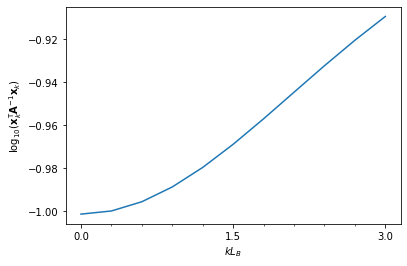

In [80]:
kaxis = np.linspace(0.0,3.0,11)
met = np.zeros(kaxis.size)
ntest = 1000
for i in range(ntest):
    theta = 2.0 * np.pi * np.random.rand(1)
    ind = 0
    for kl in kaxis:
        k = kl / Lb
        xk = np.sin(k*x + theta*np.ones(x.size))
        ak = 1.0/np.linalg.norm(xk)
        xk = ak*xk
        met[ind] += xk.transpose()@Binv@xk
        ind += 1
met = met / ntest
print(met)
ymean = np.log10(met)
print(ymean)
fig, ax = plt.subplots()
ax.plot(kaxis, ymean)
ax.set_xlabel(r"$kL_B$")
ax.set_ylabel(r"$\log_{10}(\mathbf{x}_k^\mathrm{T}\mathbf{A}^{-1}\mathbf{x}_k)$")
ax.set_xticks(kaxis[::5])
ax.set_xticks(kaxis, minor=True)
plt.show()

0
(0, 128)
[0.0997055  0.10003676 0.10101962 0.10262115 0.10478375 0.10742152
 0.11042058 0.11364647 0.11695806 0.12022425 0.12334008]
[-1.00128089 -0.99984038 -0.99559428 -0.98876312 -0.97970607 -0.96890871
 -0.95694999 -0.94444404 -0.93196984 -0.92000792 -0.90889576]
5
(5, 128)
[0.10947112 0.10976325 0.11075341 0.11244453 0.11483783 0.11739038
 0.12039403 0.12317971 0.12695938 0.12966971 0.13261506]
[-0.96070043 -0.95954304 -0.95564289 -0.94906166 -0.93991503 -0.93036749
 -0.91939505 -0.90946082 -0.8963352  -0.88716145 -0.87740715]
10
(10, 128)
[0.11923675 0.11944306 0.1206382  0.1223346  0.12415356 0.12682993
 0.13015594 0.13250671 0.13592336 0.13889016 0.14227783]
[-0.92358988 -0.92283908 -0.91851515 -0.91245069 -0.90604084 -0.89677823
 -0.885536   -0.87776212 -0.8667059  -0.85732853 -0.84686276]
20
(20, 128)
[0.138768   0.13930148 0.14043494 0.14184088 0.14393563 0.14671246
 0.14996997 0.15255954 0.15571961 0.15917535 0.16119994]
[-0.85771068 -0.85604427 -0.85252484 -0.84819858 -0

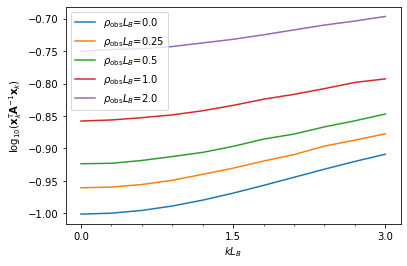

In [81]:
kaxis = np.linspace(0.0,3.0,11)
ntest = 100
Hf = np.eye(nx)
fig, ax = plt.subplots()
for rl in [0.0, 0.25, 0.5, 1.0, 2.0]:
    rho = rl / Lb
    nobs = int(rho*D)
    print(nobs)
    ind = np.random.choice(nx, nx - nobs, replace=False)
    H = np.delete(Hf, ind, axis=0)
    print(H.shape)
    Rinv = np.eye(nobs) / sigb / sigb
    if nobs == 0:
        Ainv = Binv
    else:
        Ainv = Binv + H.transpose() @ Rinv @ H

    met = np.zeros(kaxis.size)
    for i in range(ntest):
        theta = 2.0 * np.pi * np.random.rand(1)
        ind = 0
        for kl in kaxis:
            k = kl / Lb
            xk = np.sin(k*x + theta*np.ones(x.size))
            ak = 1.0/np.linalg.norm(xk)
            xk = ak*xk
            met[ind] += xk.transpose()@Ainv@xk
            ind += 1
    met = met / ntest
    print(met)
    ymean = np.log10(met)
    print(ymean)
    ax.plot(kaxis, ymean, label=r"$\rho_{\mathrm{obs}}L_B$"+"={}".format(rl))
ax.set_xlabel(r"$kL_B$")
ax.set_ylabel(r"$\log_{10}(\mathbf{x}_k^\mathrm{T}\mathbf{A}^{-1}\mathbf{x}_k)$")
ax.set_xticks(kaxis[::5])
ax.set_xticks(kaxis, minor=True)
ax.legend()
plt.show()

In [14]:
tn=21
tau=5*24*60*60.0
r_earth=1
np.log(2)*r_earth**4/tn**2/(tn+1)**2/tau

7.517228698896575e-12

In [15]:
re=6.4e6
sb=5.67e-8
Te=288.0

In [18]:
(Te**4)*sb/342.0

1.1405830251789473